<a href="https://colab.research.google.com/github/CJGS4L/stat2/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.optimize as so
import statistics as st

#1#

T=[]
n = 1000
for k in range(n):
  X = np.random.exponential(1, n+1)
  X=np.sort(X)
  m=n-1
  for i in range(1, n):
    m += ((2*i - 1)/n)*(np.log(ss.expon.cdf(X[i], loc=0, scale = 1/(np.mean(X))))+np.log(1 - ss.expon.cdf(X[n - i + 1], loc=0, scale = 1/(np.mean(X)))))
  T.append(-m)
print(T)

[3.513174645711379, 1.854162408752016, 1.519429954800348, 1.933551198117413, 2.2620562598852008, 4.633529469596525, 1.6795031349105591, 4.072484022268097, 1.4399556808411191, 2.8246271662586837, 11.227912664605924, 3.773709717399752, 9.708466022538861, 1.3911019023000277, 3.2251995476040167, 1.326857356219365, 2.5324018954216343, 1.8865666086092845, 1.801531438337864, 2.7284823977955144, 3.0771347403207785, 1.7077837096757464, 1.4567667607648003, 2.602752195668429, 1.8850991120255767, 1.392215141024044, 12.190156312057434, 1.6036140836546011, 2.282524005497778, 5.232629947116029, 2.018238430607114, 13.520533166754582, 1.490805286973117, 4.030463775155847, 5.003179725308876, 1.7554360371345217, 1.9029556081570431, 3.7497177496374774, 1.7507625501682873, 2.4101657826475353, 3.4444794100824327, 3.3965815268221102, 3.923822258951387, 2.382339887004919, 1.5390159335095803, 1.5932785825346034, 4.824587505634423, 4.148548360571525, 5.4599394572261915, 1.4320055993250254, 2.028410470707352, 2.

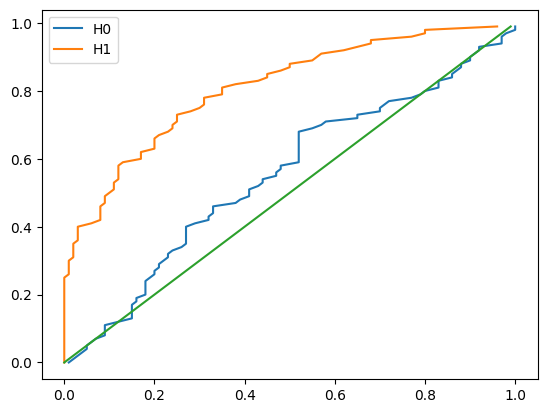

In [ ]:
S_h0=[]
ST_h0=[]
n = 100
#H0#
for k in range(n):
  Y = np.random.normal(0, 1, n)
  Y=np.sort(Y)
  m=0
  for i in range(n):
    E = st.mean(Y)
    m += ((2*i-1)/(2*n) - ss.norm.cdf(Y[i], E, math.sqrt(st.variance(Y, E))))**2
  m+=1/(12*n)
  S_h0.append(m)
r=0
for i in range(len(S_h0)):
  for j in range(len(T)):
    if(S_h0[i]>T[j]):
      r=r+1
  ST_h0.append(r/len(T))
  r=0
ST_h0=np.sort(ST_h0)


#H1#
S_h1=[]
ST_h1=[]
for k in range(n):
  Z = ss.t.rvs(df = 5, size = n)
  Z=np.sort(Z)
  m=0
  for i in range(n):
    E = st.mean(Z)
    m += ((2*i-1)/(2*n) - ss.norm.cdf(Z[i], E, math.sqrt(st.variance(Z, E))))**2
  m+=1/(12*n)
  S_h1.append(m)
r=0
for i in range(len(S_h1)):
  for j in range(len(T)):
    if(S_h1[i]<T[j]):
      r=r+1
  ST_h1.append(r/len(T))
  r=0
ST_h1=np.sort(ST_h1)

ax=np.arange(0, 1, 1/len(S_h0))
plt.plot(ST_h0, ax)
plt.plot(ST_h1, ax)
plt.plot(ax, ax)
plt.legend (('H0', 'H1'))

<ipython-input-33-48ccaa59faf8>:15: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log((ss.norm.cdf((a[i+1]-x)/y)-ss.norm.cdf((a[i]-x)/y))) for i in range(k))


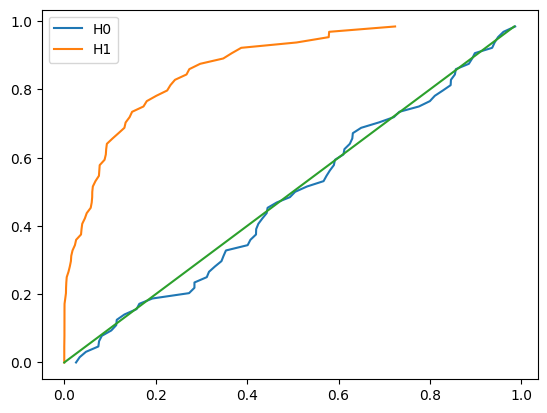

In [ ]:
#2# chi_1

n = 2**6
k = int(math.log(n, 2))
d = int(n/k)
def chi_square_1(X):
  bnds = ((None, None), (0.001, None))
  a = []
  a.append(-10**6)
  for i in range(k-1):
    a.append(X[(i+1)*d])
  a.append(10**6)
  def f(par):
    x,y=par
    return -sum(np.log((ss.norm.cdf((a[i+1]-x)/y)-ss.norm.cdf((a[i]-x)/y))) for i in range(k))
  initial = [np.mean(X), math.sqrt(np.var(X))]
  max=so.minimize(f,initial, bounds = bnds)
  mle_mu = max.x[0]
  mle_sgm = max.x[1]
  temp = [0]*(k+1)
  for m in range(k):
    temp[m]=X[d*m]
  temp[k] = X[n-1]
  p = [0]*k
  for i in range(k):
     p[i] = ss.norm.cdf((temp[i+1]-mle_mu)/mle_sgm) - ss.norm.cdf((temp[i]-mle_mu)/mle_sgm)
  ST = 0
  for i in range(k):
    ST = ST + ((d - n*p[i])*(d - n*p[i]))/(n*p[i])
  return ST

p_chi = []
p_chi_h1 = []
for i in range(n):
  X = np.random.normal(0, 1, n)
  Y = np.random.uniform(0, 5, n)
  X = np.sort(X)
  Y = np.sort(Y)
  p_chi.append(1-ss.chi2.cdf(chi_square_1(X), k-2))
  p_chi_h1.append(1-ss.chi2.cdf(chi_square_1(Y), k-2))
p_chi = np.sort(p_chi)
p_chi_h1 = np.sort(p_chi_h1)
ax = np.arange(0,1, 1/len(p_chi))
plt.plot(p_chi, ax)
plt.plot(p_chi_h1, ax)
plt.plot(ax, ax)
plt.legend (('H0', 'H1'))

<ipython-input-32-440b9a0139d0>:22: RuntimeWarning: divide by zero encountered in log
  return -sum(np.log((ss.norm.cdf((a[i+1]-x)/y)-ss.norm.cdf((a[i]-x)/y))) for i in range(k))


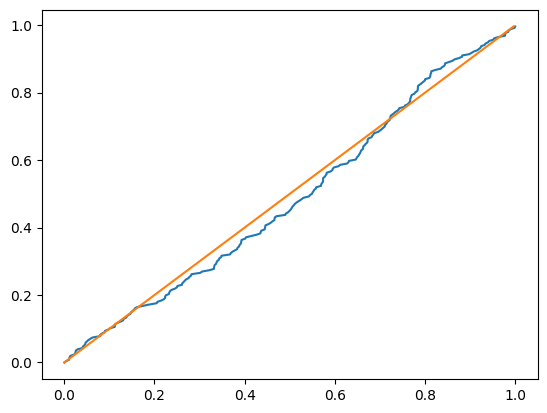

In [ ]:
#2# chi_2

n = 2**8
k = int(math.log(n, 2))
d = int(n/k)
def chi_square_1(X):
  bnds = ((None, None), (0.001, None))
  a = []
  a.append(-10**6)
  u=0
  z=0
  for j in range(k+2):
    u+=z
    z=0
    while(X[z+u]<ss.norm.ppf(float((j+1)/(k+2)), loc = 0, scale = 1) and (z+u)<=n-2):
      z+=1
    a.append(float(z))
  a.append(10**6)

  def f(par):
    x,y=par
    return -sum(np.log((ss.norm.cdf((a[i+1]-x)/y)-ss.norm.cdf((a[i]-x)/y))) for i in range(k))
  initial = [np.mean(X), math.sqrt(np.var(X))]
  max=so.minimize(f,initial, bounds = bnds)
  mle_mu = max.x[0]
  mle_sgm = max.x[1]
  temp = [0]*(k+1)
  for m in range(k):
    temp[m]=X[d*m]
  temp[k] = X[n-1]
  p = [0]*k
  for i in range(k):
     p[i] = ss.norm.cdf((temp[i+1]-mle_mu)/mle_sgm) - ss.norm.cdf((temp[i]-mle_mu)/mle_sgm)
  ST = 0
  for i in range(k):
    ST = ST + ((d - n*p[i])*(d - n*p[i]))/(n*p[i])
  return ST

p_chi = []
for i in range(n):
  X = np.random.normal(0, 1, n)
  X = np.sort(X)
  p_chi.append(1-ss.chi2.cdf(chi_square_1(X), k-2))
p_chi = np.sort(p_chi)
ax = np.arange(0,1, 1/len(p_chi))
plt.plot(p_chi, ax)
plt.plot(ax, ax)

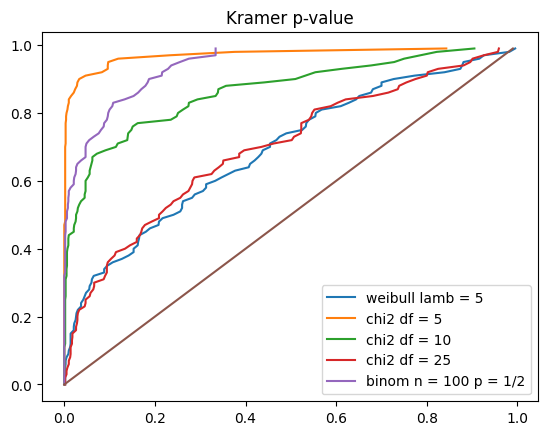

In [ ]:
#3(i)#
n = 100
S_w=[]
S_chi1 = []
S_chi2 = []
S_chi3 = []
S_b = []
ST_w=[]
ST_chi1=[]
ST_chi2=[]
ST_chi3=[]
ST_b = []
power_w = []
power_chi1 = []
power_chi2 = []
power_chi3 = []
power_b = []

lamb = 5
for k in range(n):
  Z = ss.weibull_min.rvs(lamb, size = n)
  Z_chi1 = ss.chi2.rvs(5, size = n)
  Z_chi2 = ss.chi2.rvs(10, size = n)
  Z_chi3 = ss.chi2.rvs(25, size = n)
  Z_b = ss.binom.rvs(n, 1/2, size = n)
  Z=np.sort(Z)
  Z_chi1=np.sort(Z_chi1)
  Z_chi2=np.sort(Z_chi2)
  Z_chi3=np.sort(Z_chi3)
  Z_b=np.sort(Z_b)
  m=0
  m1=0
  m2=0
  m3=0
  m4=0
  for i in range(n):
    m += ((2*i-1)/(2*n) - ss.norm.cdf(Z[i], st.mean(Z), math.sqrt(st.variance(Z))))**2
    m1 += ((2*i-1)/(2*n) - ss.norm.cdf(Z_chi1[i], st.mean(Z_chi1), math.sqrt(st.variance(Z_chi1))))**2
    m2 += ((2*i-1)/(2*n) - ss.norm.cdf(Z_chi2[i], st.mean(Z_chi2), math.sqrt(st.variance(Z_chi2))))**2
    m3 += ((2*i-1)/(2*n) - ss.norm.cdf(Z_chi3[i], st.mean(Z_chi3), math.sqrt(st.variance(Z_chi3))))**2
    m4 += ((2*i-1)/(2*n) - ss.norm.cdf(Z_b[i], st.mean(Z_b), math.sqrt(st.variance(Z_b))))**2
  m+=1/(12*n)
  m1+=1/(12*n)
  m2+=1/(12*n)
  m3+=1/(12*n)
  m4+=1/(12*n)
  S_w.append(m)
  S_chi1.append(m1)
  S_chi2.append(m2)
  S_chi3.append(m3)
  S_b.append(m4)
r=0
for i in range(n):
  for j in range(len(T)):
    if(S_w[i]<T[j]):
      r=r+1
  ST_w.append(r/len(T))
  r=0
ST_w=np.sort(ST_w)

r1=0
for i in range(n):
  for j in range(len(T)):
    if(S_chi1[i]<T[j]):
      r1=r1+1
  ST_chi1.append(r1/len(T))
  r1=0
ST_chi1=np.sort(ST_chi1)

r2=0
for i in range(n):
  for j in range(len(T)):
    if(S_chi2[i]<T[j]):
      r2=r2+1
  ST_chi2.append(r2/len(T))
  r2=0
ST_chi2=np.sort(ST_chi2)

r3=0
for i in range(n):
  for j in range(len(T)):
    if(S_chi3[i]<T[j]):
      r3=r3+1
  ST_chi3.append(r3/len(T))
  r3=0
ST_chi3=np.sort(ST_chi3)

r4=0
for i in range(n):
  for j in range(len(T)):
    if(S_b[i]<T[j]):
      r4=r4+1
  ST_b.append(r4/len(T))
  r4=0
ST_b=np.sort(ST_b)


ax=np.arange(0, 1, 1/len(S_w))
plt.title("Kramer p-value")
plt.plot(ST_w, ax)
plt.plot(ST_chi1, ax)
plt.plot(ST_chi2, ax)
plt.plot(ST_chi3, ax)
plt.plot(ST_b, ax)
plt.plot(ax, ax)
plt.legend (('weibull lamb = 5', 'chi2 df = 5', 'chi2 df = 10', 'chi2 df = 25', 'binom n = 100 p = 1/2' ))
plt.show()

In [ ]:
n = 15
def Kramer(X):
  m=0
  for i in range(n):
    m += ((2*i-1)/(2*n) - ss.norm.cdf(X[i], st.mean(X), math.sqrt(st.variance(X))))**2
  m+=1/(12*n)
  return m

def pvalue(S):
  p = 0
  for j in range(len(T)):
      if(S[i]<T[j]):
        p=p+1
  return p/len(T)

pow_w = []
pow_chi1 = []
pow_chi2 = []
pow_chi3 = []
pow_b = []

for k in range(n):
  p_chi3 = []
  for i in range(n):
    S_chi3 = []
    for j in range(n):
      X_chi3 = ss.chi2.rvs(25, size = n)
      X_chi3 = np.sort(X_chi3)
      S_chi3.append(Kramer(X_chi3))
    p_chi3.append(pvalue(S_chi3))
  p_chi3 = np.sort(p_chi3)
  pow_chi3.append(p_chi3[0])
pow_chi3 = np.sort(pow_chi3)

for k in range(n):
  p_chi1 = []
  for i in range(n):
    S_chi1 = []
    for j in range(n):
      X_chi1 = ss.chi2.rvs(5, size = n)
      X_chi1 = np.sort(X_chi1)
      S_chi1.append(Kramer(X_chi1))
    p_chi1.append(pvalue(S_chi1))
  p_chi1 = np.sort(p_chi1)
  pow_chi1.append(p_chi1[0])
pow_chi1 = np.sort(pow_chi1)

for k in range(n):
  p_chi2 = []
  for i in range(n):
    S_chi2 = []
    for j in range(n):
      X_chi2 = ss.chi2.rvs(10, size = n)
      X_chi2 = np.sort(X_chi2)
      S_chi2.append(Kramer(X_chi2))
    p_chi2.append(pvalue(S_chi2))
  p_chi2 = np.sort(p_chi2)
  pow_chi2.append(p_chi2[0])
pow_chi2 = np.sort(pow_chi2)

for k in range(n):
  p_w = []
  for i in range(n):
    S_w = []
    for j in range(n):
      X_w = ss.weibull_min.rvs(lamb = 5, size = n)
      X_w = np.sort(X_w)
      S_w.append(Kramer(X_w))
    p_w.append(pvalue(S_w))
  p_w = np.sort(p_w)
  pow_w.append(p_w[0])
pow_w = np.sort(pow_w)

for k in range(n):
  p_b = []
  for i in range(n):
    S_b = []
    for j in range(n):
      X_b = ss.binom.rvs(n, 1/2, size = n)
      X_b = np.sort(X_b)
      S_b.append(Kramer(X_b))
    p_b.append(pvalue(S_b))
  p_b = np.sort(p_b)
  pow_b.append(p_b[0])
pow_b = np.sort(pow_b)




ax=np.arange(0, 1, 1/n)
plt.title("Kramer power")
plt.plot(pow_chi3, ax)
plt.plot(pow_chi1, ax)
plt.plot(pow_chi2, ax)
plt.plot(pow_w, ax)
plt.plot(pow_b, ax)
plt.plot(ax, ax)

TypeError: _parse_args_rvs() got an unexpected keyword argument 'lamb'

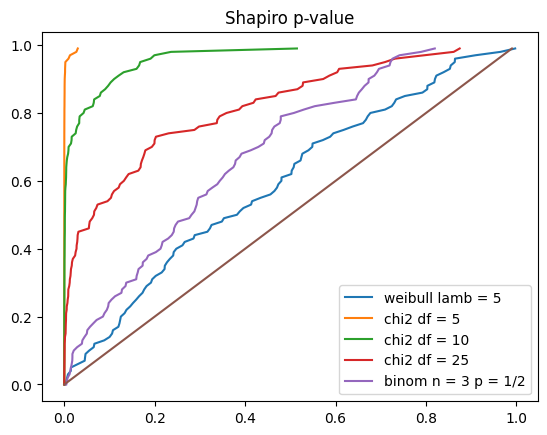

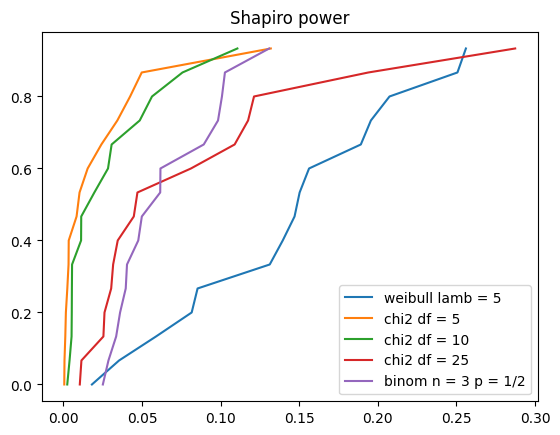

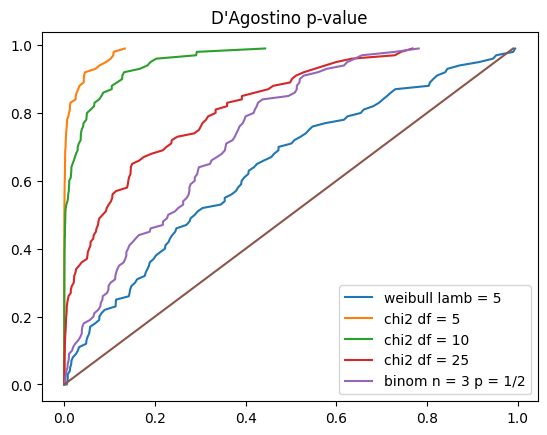

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


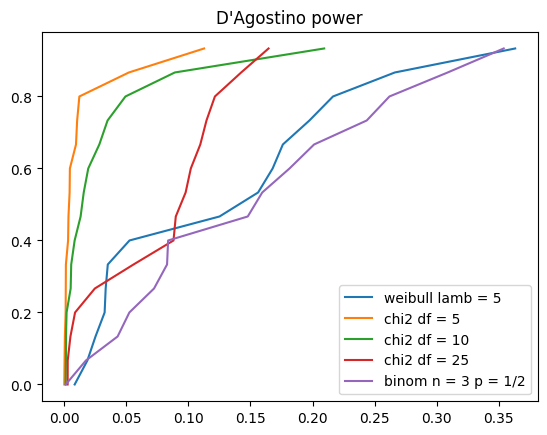

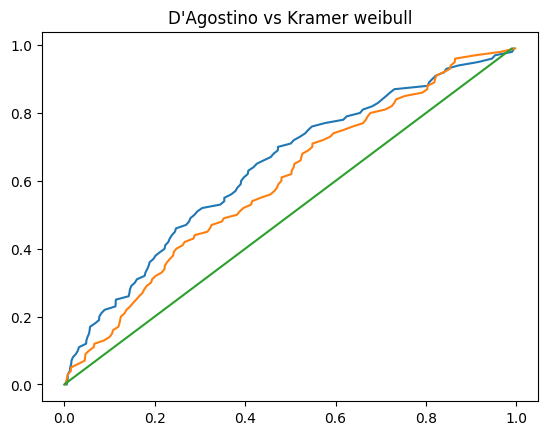

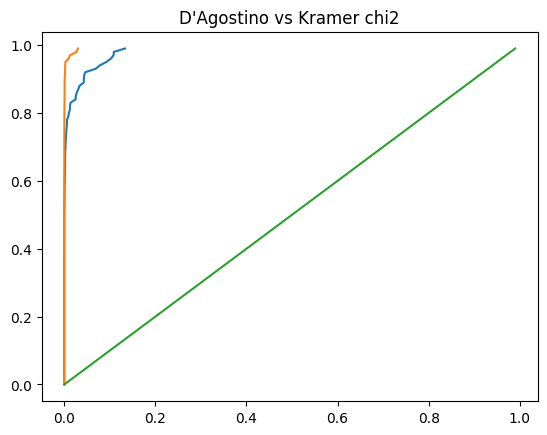

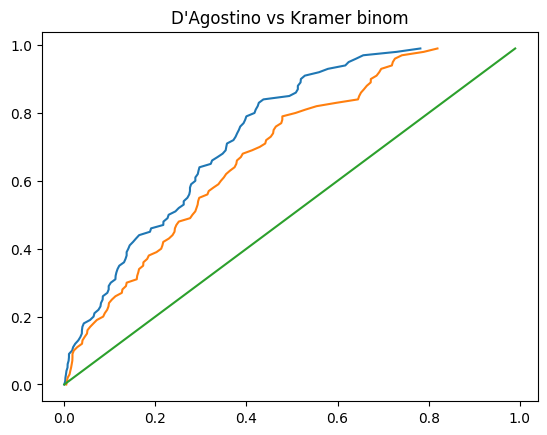

In [ ]:
#3#

#Shapiro#
n = 100
lamb = 5
p_w = []
p_chi1 = []
p_chi2 = []
p_chi3 = []
p_b = []

#alpha = 0.05#
power_w = []
power_chi1 = []
power_chi2 = []
power_chi3 = []
power_b = []

for i in range(n):
  X_w = ss.weibull_min.rvs(lamb, size = n)
  X_chi1 = ss.chi2.rvs(5, size = n)
  X_chi2 = ss.chi2.rvs(10, size = n)
  X_chi3 = ss.chi2.rvs(25, size = n)
  X_b = ss.binom.rvs(n, 1/2, size = n)
  res_w = ss.shapiro(X_w)
  res_chi1= ss.shapiro(X_chi1)
  res_chi2= ss.shapiro(X_chi2)
  res_chi3= ss.shapiro(X_chi3)
  res_b = ss.shapiro(X_b)
  p_w.append(res_w.pvalue)
  p_chi1.append(res_chi1.pvalue)
  p_chi2.append(res_chi2.pvalue)
  p_chi3.append(res_chi3.pvalue)
  p_b.append(res_b.pvalue)

ax=np.arange(0, 1, 1/n)

p_w=np.sort(p_w)
p_chi1=np.sort(p_chi1)
p_chi2=np.sort(p_chi2)
p_chi3=np.sort(p_chi3)
p_b=np.sort(p_b)

plt.title("Shapiro p-value")
plt.plot(p_w, ax)
plt.plot(p_chi1, ax)
plt.plot(p_chi2, ax)
plt.plot(p_chi3, ax)
plt.plot(p_b, ax)
plt.plot(ax, ax)

plt.legend (('weibull lamb = 5', 'chi2 df = 5', 'chi2 df = 10', 'chi2 df = 25', 'binom n = 3 p = 1/2' ))
plt.show()

p3_w = []
p3_chi1 = []
p3_chi2 = []
p3_chi3 = []
p3_b = []


n = 15
for i in range(n):
  for j in range(n):
    X_w = ss.weibull_min.rvs(lamb, size = n)
    X_chi1 = ss.chi2.rvs(5, size = n)
    X_chi2 = ss.chi2.rvs(10, size = n)
    X_chi3 = ss.chi2.rvs(25, size = n)
    X_b = ss.binom.rvs(n, 1/2, size = n)
    res_w = ss.shapiro(X_w)
    res_chi1= ss.shapiro(X_chi1)
    res_chi2= ss.shapiro(X_chi2)
    res_chi3= ss.shapiro(X_chi3)
    res_b = ss.shapiro(X_b)
    p3_w.append(res_w.pvalue)
    p3_chi1.append(res_chi1.pvalue)
    p3_chi2.append(res_chi2.pvalue)
    p3_chi3.append(res_chi3.pvalue)
    p3_b.append(res_b.pvalue)
  p3_w=np.sort(p3_w)
  p3_chi1=np.sort(p3_chi1)
  p3_chi2=np.sort(p3_chi2)
  p3_chi3=np.sort(p3_chi3)
  p3_b=np.sort(p3_b)
  power_w.append(p3_w[1])
  power_chi1.append(p3_chi1[1])
  power_chi2.append(p3_chi2[1])
  power_chi3.append(p3_chi3[1])
  power_b.append(p3_b[1])
  p3_w = []
  p3_chi1 = []
  p3_chi2 = []
  p3_chi3 = []
  p3_b = []

power_w=np.sort(power_w)
power_chi1=np.sort(power_chi1)
power_chi2=np.sort(power_chi2)
power_chi3=np.sort(power_chi3)
power_b=np.sort(power_b)

plt.title("Shapiro power")
ax=np.arange(0, 1, 1/n)
plt.plot(power_w, ax)
plt.plot(power_chi1, ax)
plt.plot(power_chi2, ax)
plt.plot(power_chi3, ax)
plt.plot(power_b, ax)

plt.legend (('weibull lamb = 5', 'chi2 df = 5', 'chi2 df = 10', 'chi2 df = 25', 'binom n = 3 p = 1/2' ))
plt.show()





#D'Agostino#

n = 100
lamb = 5
p1_w = []
p1_chi1 = []
p1_chi2 = []
p1_chi3 = []
p1_b = []
for i in range(n):
  X_w = ss.weibull_min.rvs(lamb, size = n)
  X_chi1 = ss.chi2.rvs(6, size = n)
  X_chi2 = ss.chi2.rvs(10, size = n)
  X_chi3 = ss.chi2.rvs(25, size = n)
  X_b = ss.binom.rvs(3, 1/2, size = n)
  res_w = ss.normaltest(X_w)
  res_chi1= ss.normaltest(X_chi1)
  res_chi2= ss.normaltest(X_chi2)
  res_chi3= ss.normaltest(X_chi3)
  res_b = ss.normaltest(X_b)
  p1_w.append(res_w.pvalue)
  p1_chi1.append(res_chi1.pvalue)
  p1_chi2.append(res_chi2.pvalue)
  p1_chi3.append(res_chi3.pvalue)
  p1_b.append(res_b.pvalue)

ax=np.arange(0, 1, 1/n)

p1_w=np.sort(p1_w)
p1_chi1=np.sort(p1_chi1)
p1_chi2=np.sort(p1_chi2)
p1_chi3=np.sort(p1_chi3)
p1_b=np.sort(p1_b)
plt.title("D'Agostino p-value")
plt.plot(p1_w, ax)
plt.plot(p1_chi1, ax)
plt.plot(p1_chi2, ax)
plt.plot(p1_chi3, ax)
plt.plot(p1_b, ax)
plt.plot(ax, ax)

plt.legend (('weibull lamb = 5', 'chi2 df = 5', 'chi2 df = 10', 'chi2 df = 25', 'binom n = 3 p = 1/2' ))
plt.show()


#alpha = 0.05#
power_w = []
power_chi1 = []
power_chi2 = []
power_chi3 = []
power_b = []

p2_w = []
p2_chi1 = []
p2_chi2 = []
p2_chi3 = []
p2_b = []

n = 15

for i in range(n):
  for j in range(n):
    X_w = ss.weibull_min.rvs(lamb, size = n)
    X_chi1 = ss.chi2.rvs(5, size = n)
    X_chi2 = ss.chi2.rvs(10, size = n)
    X_chi3 = ss.chi2.rvs(25, size = n)
    X_b = ss.binom.rvs(n, 1/2, size = n)
    res_w = ss.normaltest(X_w)
    res_chi1= ss.normaltest(X_chi1)
    res_chi2= ss.normaltest(X_chi2)
    res_chi3= ss.normaltest(X_chi3)
    res_b = ss.normaltest(X_b)
    p2_w.append(res_w.pvalue)
    p2_chi1.append(res_chi1.pvalue)
    p2_chi2.append(res_chi2.pvalue)
    p2_chi3.append(res_chi3.pvalue)
    p2_b.append(res_b.pvalue)
  p2_w=np.sort(p2_w)
  p2_chi1=np.sort(p2_chi1)
  p2_chi2=np.sort(p2_chi2)
  p2_chi3=np.sort(p2_chi3)
  p2_b=np.sort(p2_b)
  power_w.append(p2_w[1])
  power_chi1.append(p2_chi1[1])
  power_chi2.append(p2_chi2[1])
  power_chi3.append(p2_chi3[1])
  power_b.append(p2_b[1])
  p2_w = []
  p2_chi1 = []
  p2_chi2 = []
  p2_chi3 = []
  p2_b = []

power_w=np.sort(power_w)
power_chi1=np.sort(power_chi1)
power_chi2=np.sort(power_chi2)
power_chi3=np.sort(power_chi3)
power_b=np.sort(power_b)

plt.title("D'Agostino power")
ax=np.arange(0, 1, 1/n)
plt.plot(power_w, ax)
plt.plot(power_chi1, ax)
plt.plot(power_chi2, ax)
plt.plot(power_chi3, ax)
plt.plot(power_b, ax)

plt.legend (('weibull lamb = 5', 'chi2 df = 5', 'chi2 df = 10', 'chi2 df = 25', 'binom n = 3 p = 1/2' ))
plt.show()
n=100
plt.title("D'Agostino vs Kramer weibull")
ax=np.arange(0, 1, 1/n)
plt.plot(p1_w, ax)
plt.plot(p_w, ax)
plt.plot(ax, ax)
plt.show()

plt.title("D'Agostino vs Kramer chi2")
plt.plot(p1_chi1, ax)
plt.plot(p_chi1, ax)
plt.plot(ax, ax)
plt.show()

plt.title("D'Agostino vs Kramer binom")
plt.plot(p1_b, ax)
plt.plot(p_b, ax)
plt.plot(ax, ax)
plt.show()

In [ ]:
#Shapiro#
T_S=[]
n = 100
for k in range(n):
  X = np.random.exponential(1, size = n)
  S = 0
  for i in range(len(X)):
    S += (X[i]-np.mean(X))**2
  m = ((n)*(np.mean(X)-min(X))**2)/((n-1)*S)
  T_S.append(m)
print(T_S)

[0.0069360269976153355, 0.011311068086016814, 0.007168447703641247, 0.008132701886372542, 0.012674995937931643, 0.009469606718557849, 0.007164887172304978, 0.01098577242024413, 0.012446619888730696, 0.009914997195027095, 0.010016921682828047, 0.005362181427176156, 0.010063195449075546, 0.010756272253265625, 0.013410361465845934, 0.012209165863551252, 0.009703731016374686, 0.008282903273367701, 0.010227183066136247, 0.009980628342765063, 0.009577313126091029, 0.008594331561981507, 0.008500694291290722, 0.009685625946673722, 0.011766441678284684, 0.012976087822709592, 0.011637929436672209, 0.007730495107477315, 0.008710439396923838, 0.009856587701132284, 0.013163208161605936, 0.008531280628826939, 0.012775488985680325, 0.012675232107429858, 0.010500730771332924, 0.011117775859108184, 0.01211967904909658, 0.008360772229185607, 0.008119213438300656, 0.014718471836648818, 0.009627939639821502, 0.013629098196973086, 0.010300387654771264, 0.008585328323825988, 0.00866474360931808, 0.011233655

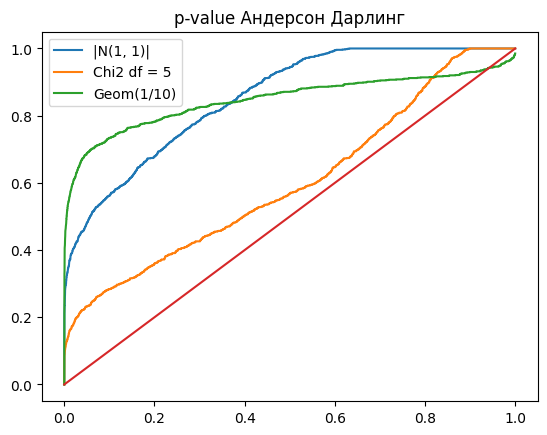

In [ ]:
#4*#
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.optimize as so
import statistics as st

mu = 1
p = 1/10
n = 100
m = 5
l = 10000
p_1 = []
p_2 = []
p_3 = []

ST_1 = []
ST_2 = []
ST_3 = []
for i in range(l):
  X1 = list(map(lambda x: abs(x) , ss.norm.rvs(mu, 1, size = n)))
  X2 = ss.chi2.rvs(df = m, size = n)
  X3 = ss.geom.rvs(p, size = n)
  ST_1.append(ss.anderson(X1).statistic)
  ST_2.append(ss.anderson(X2).statistic)
  ST_3.append(ss.anderson(X3).statistic)
r1 = 0
r2 = 0
r3 = 0
for f in range(len(ST_1)):
  for k in range(len(T)):
    if(ST_1[f]<T[k]):
      r1+=1
    if(ST_2[f]<T[k]):
      r2+=1
    if(ST_3[f]<T[k]):
      r3+=1
  p_1.append(r1/len(T))
  p_2.append(r2/len(T))
  p_3.append(1- r3/len(T))
  r1 = 0
  r2 = 0
  r3 = 0

p_1.append(0)
p_2.append(0)
p_3.append(0)

p_1 = np.sort(p_1)
p_2 = np.sort(p_2)
p_3 = np.sort(p_3)

plt.title("p-value Андерсон Дарлинг")
ax=np.arange(0, 1, 1/(l+1))
plt.plot(ax, p_1)
plt.plot(ax, p_2)
plt.plot(ax, p_3)
plt.legend(('|N(1, 1)|','Chi2 df = 5', 'Geom(1/10)'))
plt.plot(ax, ax)

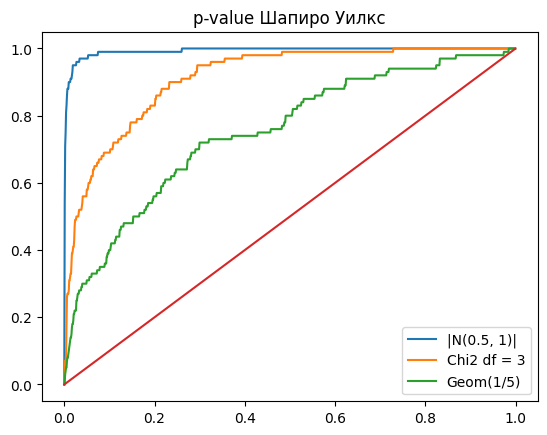

In [ ]:
mu = 0.5
p = 1/5
n = 100
m = 3
l = 1000
p_1 = []
p_2 = []
p_3 = []

ST_1 = []
ST_2 = []
ST_3 = []
for i in range(l):
  X1 = list(map(lambda x: abs(x) , ss.norm.rvs(mu, 1, size = n)))
  X2 = ss.chi2.rvs(df = m, size = n)
  X3 = ss.geom.rvs(p, size = n)

  S = 0
  for i in range(1, len(X1)):
    S += (X1[i]-np.mean(X1))**2
  ST_1.append((n*(np.mean(X1)-min(X1))**2)/((n-1)*S))

  S = 0
  for i in range(1, len(X2)):
    S += (X2[i]-np.mean(X2))**2
  ST_2.append((n*(np.mean(X2)-min(X2))**2)/((n-1)*S))

  S = 0
  for i in range(1, len(X3)):
    S += (X3[i]-np.mean(X3))**2
  ST_3.append((n*(np.mean(X3)-min(X3))**2)/((n-1)*S))

r1 = 0
r2 = 0
r3 = 0
for f in range(len(ST_1)):
  for k in range(len(T_S)):
    if(ST_1[f]<T_S[k]):
      r1+=1
    if(ST_2[f]<T_S[k]):
      r2+=1
    if(ST_3[f]<T_S[k]):
      r3+=1
  p_1.append(1- r1/len(T_S))
  p_2.append(1-r2/len(T_S))
  p_3.append(r3/len(T_S))
  r1 = 0
  r2 = 0
  r3 = 0

p_1.append(0)
p_2.append(0)
p_3.append(0)
p_1 = np.sort(p_1)
p_2 = np.sort(p_2)
p_3 = np.sort(p_3)

plt.title("p-value Шапиро Уилкс")
ax=np.arange(0, 1, 1/(l+1))
plt.plot(ax, p_1)
plt.plot(ax, p_2)
plt.plot(ax, p_3)
plt.legend(('|N(0.5, 1)|','Chi2 df = 3', 'Geom(1/5)'))
plt.plot(ax, ax)

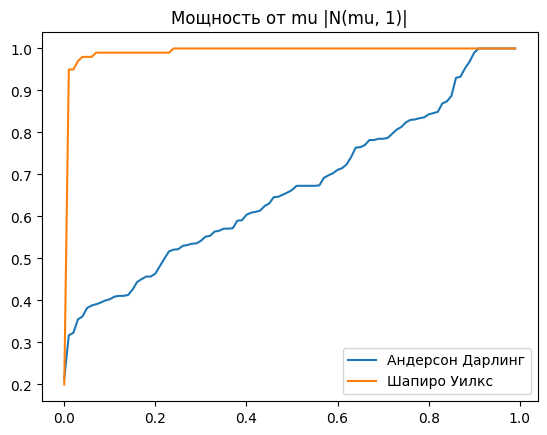

In [ ]:
#Мощности#
def power_ad_1(mu):
  r = 0
  X = list(map(lambda x: abs(x) , ss.norm.rvs(mu, 1, size = n)))
  X = np.sort(X)
  ST = ss.anderson(X).statistic
  for i in range(len(T)):
    if(ST>T[i]):
      r+=1
  return 1 - r/len(T)

def power_sh_1(mu):
  r = 0
  S = 0
  X = list(map(lambda x: abs(x) , ss.norm.rvs(mu, 1, size = n)))
  X = np.sort(X)
  for i in range(1, len(X)):
    S += (X[i]-np.mean(X))**2
  ST = ((n*(np.mean(X)-min(X))**2)/((n-1)*S))
  for i in range(len(T_S)):
    if(ST>T_S[i]):
      r+=1
  return r/len(T_S)



mu = np.arange(0, 1, 0.01)
p_ad = []
p_sh = []
for i in range(len(mu)):
  p_ad.append(power_ad_1(mu[i]))
  p_sh.append(power_sh_1(mu[i]))
p_sh[0] = 0.2
p_ad = np.sort(p_ad)
p_sh = np.sort(p_sh)
plt.title("Мощность от mu |N(mu, 1)|")
plt.plot(mu, p_ad)
plt.plot(mu, p_sh)
plt.legend(('Андерсон Дарлинг','Шапиро Уилкс'))

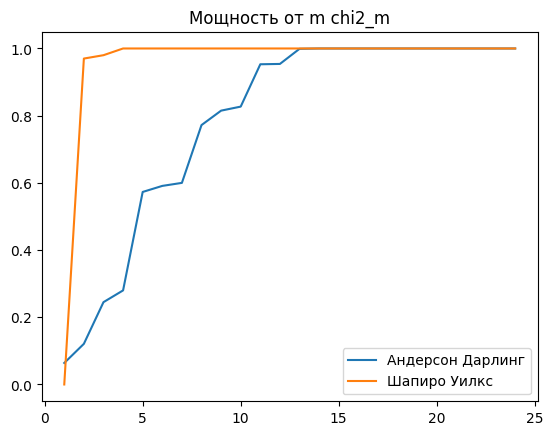

In [ ]:
def power_ad_1(m):
  r = 0
  X = ss.chi2.rvs(df = m, size = n)
  X = np.sort(X)
  ST = ss.anderson(X).statistic
  for i in range(len(T)):
    if(ST>T[i]):
      r+=1
  return 1 - r/len(T)

def power_sh_1(m):
  r = 0
  S = 0
  X = ss.chi2.rvs(df = m, size = n)
  X = np.sort(X)
  for i in range(1, len(X)):
    S += (X[i]-np.mean(X))**2
  ST = ((n*(np.mean(X)-min(X))**2)/((n-1)*S))
  for i in range(len(T_S)):
    if(ST>T_S[i]):
      r+=1
  return r/len(T_S)



m = np.arange(1, 25, 1)
p_ad = []
p_sh = []
for i in range(len(m)):
  p_ad.append(power_ad_1(m[i]))
  p_sh.append(power_sh_1(m[i]))
p_ad = np.sort(p_ad)
p_sh = np.sort(p_sh)
plt.title("Мощность от m chi2_m")
plt.plot(m, p_ad)
plt.plot(m, p_sh)
plt.legend(('Андерсон Дарлинг','Шапиро Уилкс'))

<ipython-input-222-37791ca8eff2>:18: RuntimeWarning: invalid value encountered in scalar divide
  ST = ((n*(np.mean(X)-min(X))**2)/((n-1)*S))


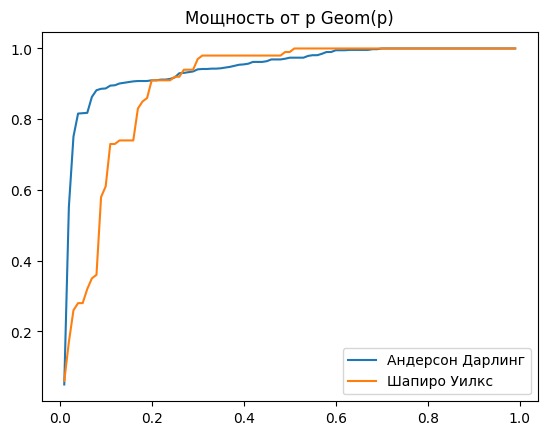

In [ ]:
def power_ad_1(p):
  r = 0
  X = ss.geom.rvs(p, size = n)
  X = np.sort(X)
  ST = ss.anderson(X).statistic
  for i in range(len(T)):
    if(ST>T[i]):
      r+=1
  return r/len(T)

def power_sh_1(p):
  r = 0
  S = 0
  X = ss.geom.rvs(p, size = n)
  X = np.sort(X)
  for i in range(1, len(X)):
    S += (X[i]-np.mean(X))**2
  ST = ((n*(np.mean(X)-min(X))**2)/((n-1)*S))
  for i in range(len(T_S)):
    if(ST>T_S[i]):
      r+=1
  return 1 - r/len(T_S)

p = np.arange(0.01, 1, 0.01)
p_ad = []
p_sh = []
for i in range(len(p)):
  p_ad.append(power_ad_1(p[i]))
  p_sh.append(power_sh_1(p[i]))
p_ad[0] = 0.05
p_ad = np.sort(p_ad)
p_sh = np.sort(p_sh)
plt.title("Мощность от p Geom(p)")
plt.plot(p, p_ad)
plt.plot(p, p_sh)
plt.legend(('Андерсон Дарлинг','Шапиро Уилкс'))